In [2]:
from constants.physical_constants import PhysicalConstants
import numpy as np
import matplotlib.pyplot as plt


# Projectile Motion with collisionional dampening

A ball is thrown with intial velocity $\vec{v}_0$ and then collides with the ground and bounces. The ball is subject to a drag force $F_d = -b\vec{v}$ where $b$ is a constant.  The ball is also subject to gravity $F_g = -mg\hat{y}$.  The equation of motion is given by:
$$\frac{d\vec{v}}{dt} = -\frac{b}{m}\vec{v} - g\hat{y}$$

We can solve this equation by separating the components of the velocity and integrating.  We will assume that the ball bounces with a coefficient of restitution $e$ such that the velocity after the bounce is $e\vec{v}$ in the direction of the velocity before the bounce.  We will also assume that the ball is thrown from the origin.
We will use the following parameters:
- $m = 0.15$ kg
- $b = 0.01$ kg/s
- $g = 9.8$ m/s$^2$
- $e = 0.8$
- $\vec{v}_0 = (10, 10)$ m/s
We will plot the trajectory of the ball and the velocity of the ball as a function of time.



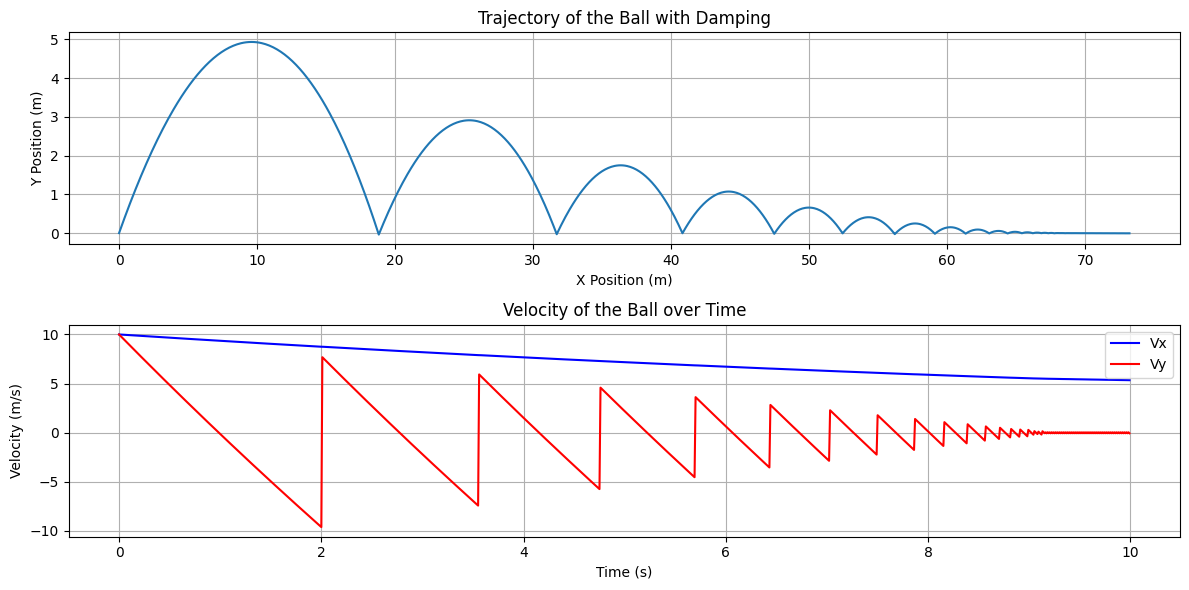

In [3]:
# Constants
m = 0.15  # kg
b = 0.01  # kg/s
g = 9.8   # m/s^2
e = 0.8   # coefficient of restitution
v0 = np.array([10, 10])  # Initial velocity in m/s
dt = 0.01  # Time step in seconds
total_time = 10  # Total time in seconds
steps = int(total_time / dt)

# Initialize variables
position = np.array([0.0, 0.0])  # Starting from the origin with float datatype
velocity = np.array(v0, dtype=float)  # Ensure initial velocity is also float
positions = []
velocities = []
time_list = np.arange(0, total_time, dt)

# Simulation loop
for t in time_list:
    positions.append(position.copy())
    velocities.append(velocity.copy())

    # Update position
    position += velocity * dt

    # Update velocity under the effects of drag and gravity
    if position[1] <= 0 and velocity[1] < 0:  # Collision with the ground
        velocity[1] = -e * velocity[1]  # Reverse velocity based on restitution
    else:
        # Apply forces
        drag_force = -b * velocity
        gravity_force = np.array([0, -m * g])
        net_force = drag_force + gravity_force
        acceleration = net_force / m
        velocity += acceleration * dt  # Update with acceleration

# Convert lists to numpy arrays for plotting
positions = np.array(positions)
velocities = np.array(velocities)

# Plot trajectory
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(positions[:, 0], positions[:, 1])
plt.title('Trajectory of the Ball with Damping')
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.grid()

# Plot velocity
plt.subplot(2, 1, 2)
plt.plot(time_list, velocities[:, 0], label='Vx', color='b')
plt.plot(time_list, velocities[:, 1], label='Vy', color='r')
plt.title('Velocity of the Ball over Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

## Projectile Motion, Air resistance

$$F = -mg + bv$$
where b is the damping coefficient.
The equations of motion are:
$$a(t) = \frac{F}{m} = -g + \frac{b}{m}v$$
$$v(t) = v(0) + \int^t_0 a(t) dt$$
$$x(t) = x(0) + \int^t_0 v(t) dt$$

With Initial conditions:

- $x_0 = 0$
- $v_0 = 10$
- $y_0 = 0$
- $g = 9.8$
- $b = 0.1$
- $m = 1$


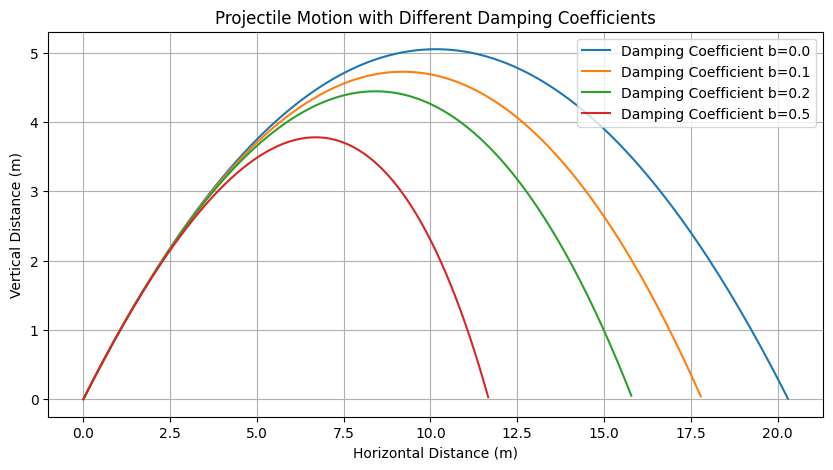

In [9]:
# Constants
m = 1       # kg
g = 9.8     # m/s^2
v0 = np.array([10, 10])  # Initial velocity [vx, vy]
x0 = np.array([0, 0])    # Initial position [x, y]
dt = 0.01                # Time step
total_time = 5           # Total time for simulation
steps = int(total_time / dt)

# Different damping coefficients
b_values = [0.0, 0.1, 0.2, 0.5]
plt.figure(figsize=(10, 5))

for b in b_values:
    # Initialize variables
    position = np.array(x0, dtype=float)
    velocity = np.array(v0, dtype=float)
    positions = []
    # Simulation loop
    while position[1] >= 0:
        positions.append(position.copy())

        # Update acceleration
        acceleration = np.array([0, -g]) - (b / m) * velocity

        # Update velocity
        velocity += acceleration * dt

        # Update position
        position += velocity * dt

    # Convert to array
    positions = np.array(positions)

    # Plot the trajectory
    plt.plot(positions[:, 0], positions[:, 1], label=f'Damping Coefficient b={b}')

# Plot settings
plt.title("Projectile Motion with Different Damping Coefficients")
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("Vertical Distance (m)")

plt.legend()
plt.grid()
plt.show()


## Combine Air resistance and Collisional dampening

